## Data Exploration and Visualisation

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

np.random.seed(42) 

In [2]:
# load dataset into variable assign
assign =pd.read_csv("dataset.csv", na_values=['unknown'])
assign

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,Female,31,Married,1,College,$12500 - $24999,Others,Friends,Sunny,28,...,NaN,often,often,NaN,Fast Food,Yes,1,0,0,1
12368,Female,36,Married,0,Bachelors degree,$25000 - $37499,Home,Alone,Rainy,13,...,sometimes,often,often,often,Coffee House,Yes,0,0,1,0
12369,Female,21,Partner,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,13,...,rarely,sometimes,sometimes,rarely,Coffee House,Yes,1,1,0,0
12370,Male,31,Married,0,College,$100000 or More,Work,Alone,Sunny,28,...,never,often,sometimes,sometimes,Fast Food,Yes,0,0,1,1


In [3]:
assign.head()

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1


In [4]:
assign.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12372 entries, 0 to 12371
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            12372 non-null  object
 1   age               12372 non-null  int64 
 2   maritalStatus     12372 non-null  object
 3   children          12372 non-null  int64 
 4   education         12372 non-null  object
 5   income            12372 non-null  object
 6   destination       12372 non-null  object
 7   passanger         12372 non-null  object
 8   weather           12372 non-null  object
 9   temperature       12372 non-null  int64 
 10  time              12372 non-null  int64 
 11  visitPub          12267 non-null  object
 12  visitCoffeeHouse  12158 non-null  object
 13  visitFastFood     12224 non-null  object
 14  visitFoodCourt    12244 non-null  object
 15  visitRestaurant   12186 non-null  object
 16  storeType         12372 non-null  object
 17  offerEndSoon

In [5]:
assign.describe()

,age,children,temperature,time,moreThan5km,moreThan15km,sameDirection,stopBy(y)
count,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000
mean,32.906240,0.413919,18.343033,13.819835,0.561510,0.119463,0.215002,0.568704
std,11.579339,0.492554,10.863280,5.408967,0.496222,0.324346,0.410840,0.495277
min,18.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,28.000000,14.000000,1.000000,0.000000,0.000000,1.000000
75%,41.000000,1.000000,28.000000,18.000000,1.000000,0.000000,0.000000,1.000000
max,55.000000,1.000000,28.000000,22.000000,1.000000,1.000000,1.000000,1.000000


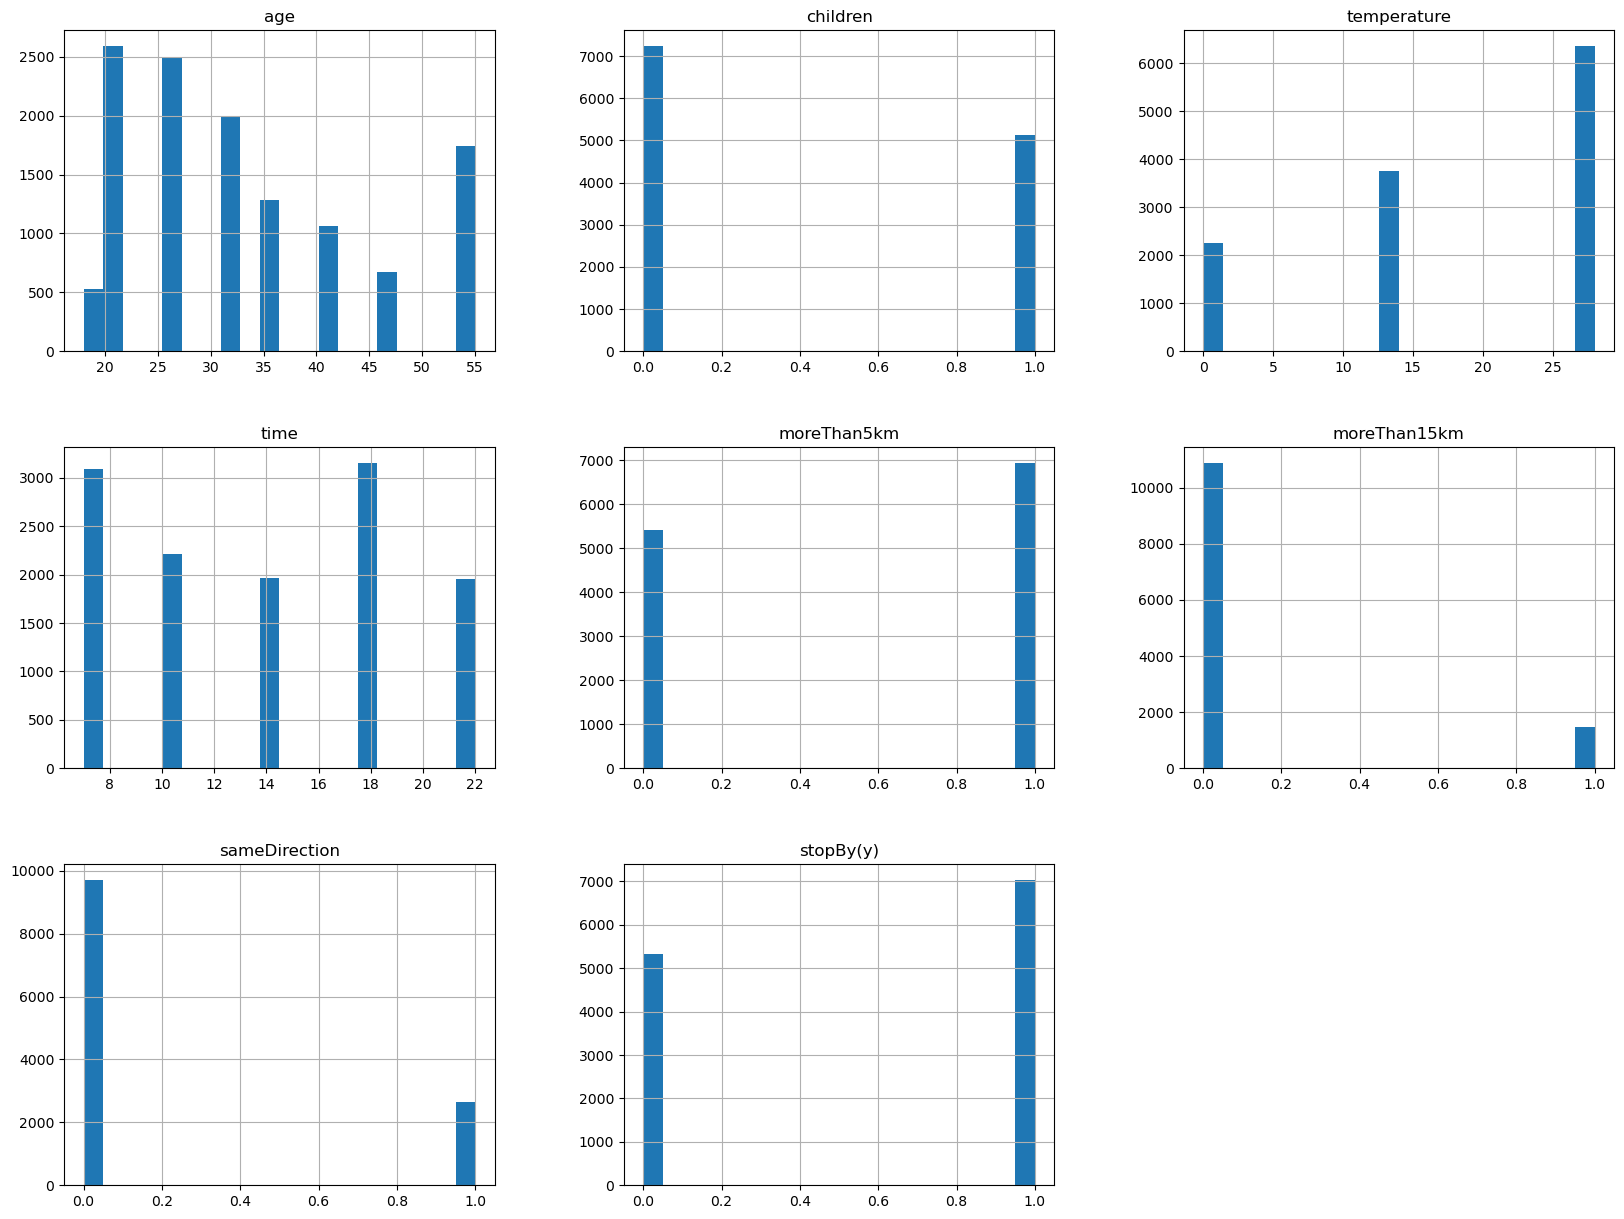

In [6]:
assign.hist(bins=20, figsize = (20,15))
plt.show()

## Data Pre-processing

In [6]:
X = assign.drop("stopBy(y)",axis=1)
y = assign["stopBy(y)"]

print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)


Shape of X =  (12372, 21)
Shape of y =  (12372,)


In [7]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=30)

print("full set shape", X.shape)
print("train set shape", X_train.shape)
print("test set shape", X_test.shape)

full set shape (12372, 21)
train set shape (9897, 21)
test set shape (2475, 21)


In [8]:
X_train_num = X_train.drop(['gender','maritalStatus','education','income','destination','passanger','weather','visitPub','visitCoffeeHouse','visitFastFood','visitFoodCourt','visitRestaurant','storeType','offerEndSoon'],axis=1)

X_train_cat = X_train[['gender','maritalStatus','education','income','destination','passanger','weather','visitPub','visitCoffeeHouse','visitFastFood','visitFoodCourt','visitRestaurant','storeType','offerEndSoon']]

print('X_train_num shape:', X_train_num.shape)
print('X_train_cat shape:', X_train_cat.shape)


X_train_num shape: (9897, 7)
X_train_cat shape: (9897, 14)


In [9]:
print('\nNumber of missing values for categorical features:')

print(X_train_cat.isnull().sum())



Number of missing values for categorical features:
gender                0
maritalStatus         0
education             0
income                0
destination           0
passanger             0
weather               0
visitPub             86
visitCoffeeHouse    165
visitFastFood       122
visitFoodCourt      109
visitRestaurant     154
storeType             0
offerEndSoon          0
dtype: int64


In [10]:
imputer_cat = SimpleImputer(strategy='most_frequent')
 
# transform the dataset
X_train_cat_tr= imputer_cat.fit_transform(X_train_cat)

#arrange back to the original order and change to DataFrame
X_train_cat_tr_pd = pd.DataFrame(X_train_cat_tr, columns = X_train_cat.columns)

print(X_train_cat_tr_pd)
X_train_cat_tr_pd.isnull().sum()

      gender maritalStatus             education            income  \
0     Female       Partner               College  Less than $12500   
1     Female        Single               College   $12500 - $24999   
2     Female       Partner  High School Graduate  Less than $12500   
3       Male       Married       Graduate degree   $100000 or More   
4     Female       Married               College   $100000 or More   
...      ...           ...                   ...               ...   
9892    Male        Single      Bachelors degree   $50000 - $62499   
9893  Female        Single      Bachelors degree   $25000 - $37499   
9894    Male        Single               College   $50000 - $62499   
9895    Male       Married       Graduate degree   $87500 - $99999   
9896  Female        Single       Graduate degree   $25000 - $37499   

     destination passanger weather   visitPub visitCoffeeHouse visitFastFood  \
0           Home     Alone   Sunny      never        sometimes         often   

gender              0
maritalStatus       0
education           0
income              0
destination         0
passanger           0
weather             0
visitPub            0
visitCoffeeHouse    0
visitFastFood       0
visitFoodCourt      0
visitRestaurant     0
storeType           0
offerEndSoon        0
dtype: int64

In [11]:
print('Number of missing values for numerical features:')

print(X_train_num.isnull().sum())

Number of missing values for numerical features:
age              0
children         0
temperature      0
time             0
moreThan5km      0
moreThan15km     0
sameDirection    0
dtype: int64


In [12]:
imputer_num = SimpleImputer(strategy ="median")

imputer_num.fit(X_train_num)

X_train_num_tr = imputer_num.transform(X_train_num)

X_train_num_tr

array([[21.,  1., 28., ...,  0.,  0.,  0.],
       [41.,  1., 28., ...,  0.,  0.,  1.],
       [18.,  0., 28., ...,  0.,  0.,  1.],
       ...,
       [36.,  0., 28., ...,  1.,  0.,  0.],
       [46.,  1.,  0., ...,  0.,  0.,  0.],
       [36.,  1., 13., ...,  1.,  0.,  0.]])

In [13]:
print("Type of X_train_num:", type(X_train_num))
print("Type of X_train_num_tr", type(X_train_num_tr))

X_train_num_tr_pd = pd.DataFrame(X_train_num_tr, columns = X_train_num.columns)

Type of X_train_num: <class 'pandas.core.frame.DataFrame'>
Type of X_train_num_tr <class 'numpy.ndarray'>


In [14]:
X_train_num_tr_pd.isnull().sum()

age              0
children         0
temperature      0
time             0
moreThan5km      0
moreThan15km     0
sameDirection    0
dtype: int64

In [15]:
scaler = StandardScaler()

scaler.fit(X_train_num_tr)

X_train_num_tr = scaler.transform(X_train_num_tr)

In [16]:
print('Mean of all columns:\n', X_train_num_tr.mean(axis=0))
print('\nStd of all columns:\n', X_train_num_tr.std())

Mean of all columns:
 [ 1.18459686e-16  7.82551866e-17  4.23583120e-17  1.01229186e-16
  1.29228749e-17  1.36408123e-17 -1.74997264e-17]

Std of all columns:
 0.9999999999999999


In [17]:
le_encoder = LabelEncoder()
lb_encoder1 = LabelBinarizer()
lb_encoder2 = LabelBinarizer()
lb_encoder3 = LabelBinarizer()
lb_encoder4 = LabelBinarizer()
lb_encoder5 = LabelBinarizer()
lb_encoder6 = LabelBinarizer()


X_train_cat_1 = lb_encoder1.fit_transform(X_train_cat_tr_pd['gender'])
X_train_cat_2 = lb_encoder2.fit_transform(X_train_cat_tr_pd['maritalStatus'])
X_train_cat_3 = le_encoder.fit_transform(X_train_cat_tr_pd['education'])
X_train_cat_4 = lb_encoder3.fit_transform(X_train_cat_tr_pd['income'])
X_train_cat_5 = lb_encoder4.fit_transform(X_train_cat_tr_pd['destination'])
X_train_cat_6 = lb_encoder5.fit_transform(X_train_cat_tr_pd['passanger'])
X_train_cat_7 = lb_encoder6.fit_transform(X_train_cat_tr_pd['weather'])
X_train_cat_8 = lb_encoder6.fit_transform(X_train_cat_tr_pd['visitPub'])
X_train_cat_9 = lb_encoder6.fit_transform(X_train_cat_tr_pd['visitCoffeeHouse'])
X_train_cat_10 = lb_encoder6.fit_transform(X_train_cat_tr_pd['visitFastFood'])
X_train_cat_11 = lb_encoder6.fit_transform(X_train_cat_tr_pd['visitFoodCourt'])
X_train_cat_12 = lb_encoder6.fit_transform(X_train_cat_tr_pd['visitRestaurant'])
X_train_cat_13 = lb_encoder6.fit_transform(X_train_cat_tr_pd['storeType'])
X_train_cat_14 = lb_encoder6.fit_transform(X_train_cat_tr_pd['offerEndSoon'])


In [18]:
X_train_cat_3 = pd.DataFrame(X_train_cat_3)
X_train_cat_3

,0
0,2
1,2
2,5
3,3
4,2
...,...
9892,1
9893,1
9894,2
9895,3


In [19]:
X_train_cat_tr = np.hstack([X_train_cat_1, X_train_cat_2, X_train_cat_3, X_train_cat_4, X_train_cat_5, X_train_cat_6, 
                            X_train_cat_7,X_train_cat_8,X_train_cat_9,X_train_cat_10,X_train_cat_11,X_train_cat_12,X_train_cat_13
                           ,X_train_cat_14])


X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])
                       
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (9897, 64)
y_train shape: (9897,)


In [23]:
if isinstance(y_train, pd.Series):
    y_train = y_train.values

In [24]:
RandomOS = RandomOverSampler(sampling_strategy = "minority")

In [25]:
X_train_tr_ros, y_train_ros = RandomOS.fit_resample(X_train_tr, y_train)
print("X_train_tr_ros", X_train_tr_ros)
print("y_train_ros", y_train_ros)

X_train_tr_ros [[-1.0333491   1.1890763   0.88600904 ...  0.          0.
   0.        ]
 [ 0.6942671   1.1890763   0.88600904 ...  0.          0.
   0.        ]
 [-1.29249153 -0.84098893  0.88600904 ...  0.          1.
   1.        ]
 ...
 [ 1.90359844 -0.84098893 -0.49644778 ...  0.          0.
   1.        ]
 [-1.0333491  -0.84098893  0.88600904 ...  0.          0.
   1.        ]
 [-0.60144505 -0.84098893  0.88600904 ...  0.          0.
   0.        ]]
y_train_ros [1 1 0 ... 0 0 0]


## Random Forest Classifier model

In [26]:
forest_clf_1 = RandomForestClassifier(n_estimators=10, 
                                   random_state=42)

forest_clf_1.fit(X_train_tr, y_train)

y_pred1 = forest_clf_1.predict(X_train_tr)

def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

show10results(y_pred1, y_train)

Result for the 10 random samples:
actual =       0 pred =      0
actual =       1 pred =      1
actual =       0 pred =      0
actual =       1 pred =      1
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0


In [27]:
forest_clf_2 = RandomForestClassifier(n_estimators=10, 
                                   random_state=42)
forest_clf_2.fit(X_train_tr_ros, y_train_ros)

y_pred2 = forest_clf_2.predict(X_train_tr_ros)

show10results(y_pred2, y_train_ros)

Result for the 10 random samples:
actual =       0 pred =      0
actual =       1 pred =      1
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0


In [28]:
acc1=accuracy_score(y_train, y_pred1)
print("Training accuracy: ", round(acc1, 4))

k_scores1 = cross_val_score(forest_clf_1, X_train_tr, y_train, cv=3, scoring='accuracy')
print(k_scores1)

Training accuracy:  0.9887
[0.6880873  0.71142771 0.71536829]


In [29]:
acc2=accuracy_score(y_train_ros, y_pred2)
print("Training accuracy: ", round(acc2, 4))

k_scores2 = cross_val_score(forest_clf_2, X_train_tr_ros, y_train_ros, cv=3, scoring='accuracy')
print(k_scores2)

Training accuracy:  0.9893
[0.72615549 0.7507347  0.78540887]


In [30]:
y_pred_cv1 = cross_val_predict(forest_clf_1, X_train_tr, y_train, cv=3)
y_pred_cv1

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
y_pred_cv2 = cross_val_predict(forest_clf_2, X_train_tr_ros, y_train_ros, cv=3)
y_pred_cv2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
#Problems with accuracy

y_train_pred1 = forest_clf_1.predict(X_train_tr) 
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred1))

y_train_allfalse1 = np.zeros(len(y_train), dtype=bool)
print('Accuracy using all zeros values:', accuracy_score(y_train, y_train_allfalse1))

Accuracy using prediction values: 0.9886834394260887
Accuracy using all zeros values: 0.4327574012326968


In [33]:
#Problems with accuracy

y_train_pred2 = forest_clf_2.predict(X_train_tr_ros) 
print('Accuracy using prediction values:', accuracy_score(y_train_ros, y_train_pred2))

y_train_allfalse2 = np.zeros(len(y_train_ros), dtype=bool)
print('Accuracy using all zeros values:', accuracy_score(y_train_ros, y_train_allfalse2))

Accuracy using prediction values: 0.9893124332027076
Accuracy using all zeros values: 0.5


In [34]:
cm1=confusion_matrix(y_train, y_pred_cv1)
print(cm1)

[[2948 1335]
 [1585 4029]]


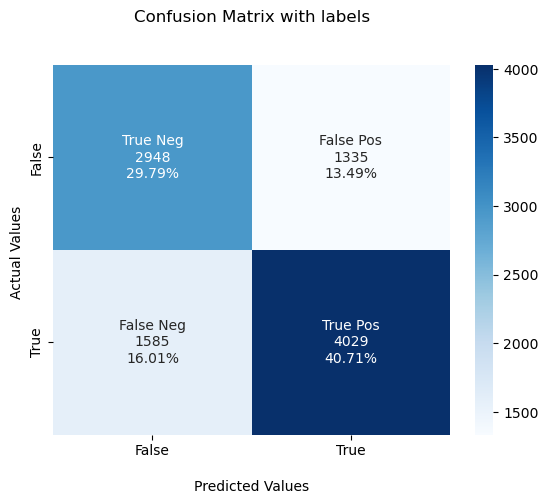

In [37]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
cm2=confusion_matrix(y_train_ros, y_pred_cv2)
print(cm2)

[[4657  957]
 [1804 3810]]


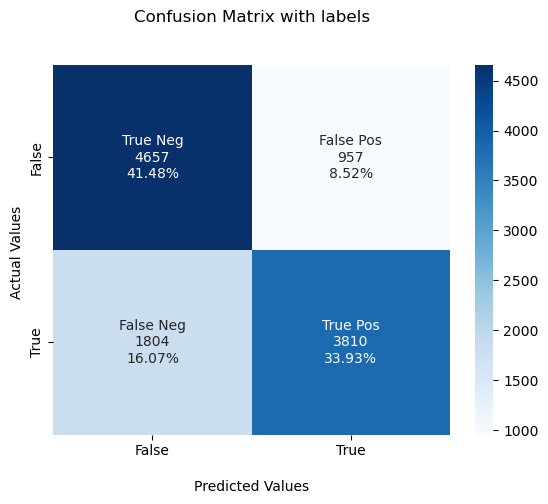

In [39]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
print("Precision = {:.4f}".format(precision_score(y_train,y_pred_cv1)))
print("Recall = {:.4f}".format(recall_score(y_train,y_pred_cv1)))
print("f1 score = {:.4f}".format(f1_score(y_train,y_pred_cv1)))

Precision = 0.7511
Recall = 0.7177
f1 score = 0.7340


In [41]:
print("Precision = {:.4f}".format(precision_score(y_train_ros,y_pred_cv2)))
print("Recall = {:.4f}".format(recall_score(y_train_ros,y_pred_cv2)))
print("f1 score = {:.4f}".format(f1_score(y_train_ros,y_pred_cv2)))

Precision = 0.7992
Recall = 0.6787
f1 score = 0.7340


In [42]:
y_scores_cv=cross_val_predict(forest_clf_1,
                             X_train_tr_ros,
                             y_train_ros,
                             cv=3,
                             method="predict_proba")
y_scores_cv
y_scores_cv = y_scores_cv[:, 1]

In [43]:
precisions, recalls, thresholds =  precision_recall_curve(y_train_ros,y_scores_cv)

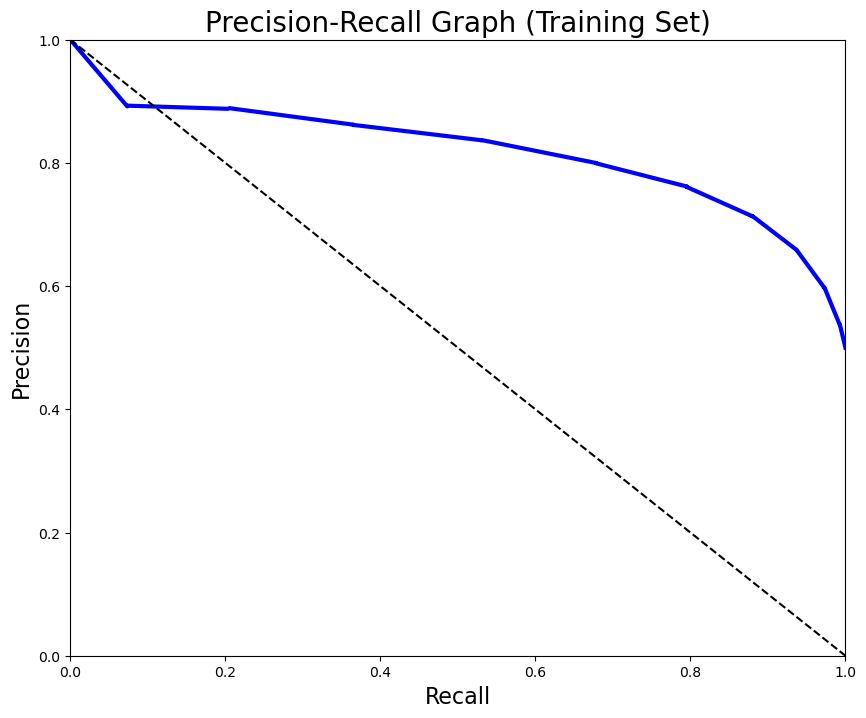

In [44]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(10, 8))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

In [45]:
fpr, tpr, thresholds = roc_curve(y_train_ros, y_scores_cv)

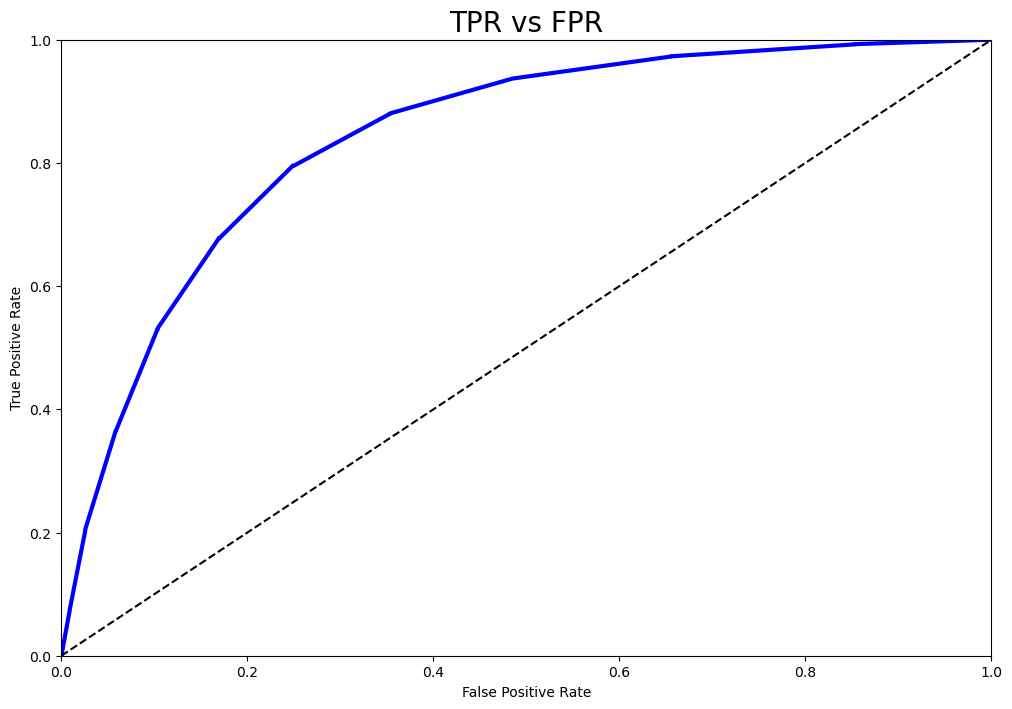

In [46]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)
    

plt.figure(figsize=(12, 8))
plot_roc_curve(fpr, tpr)

In [47]:
auc = roc_auc_score(y_train_ros, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.8410


In [48]:
n_estimators = [24,40,56]
max_features = ['auto', 'sqrt']
max_depth = [20,40]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = forest_clf_1,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train_tr_ros, y_train_ros)

print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random grid:  {'n_estimators': [24, 40, 56], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 56, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}  



In [49]:
best_model_forest = rf_random.best_estimator_
best_model_forest

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=56,
                       random_state=42)

In [50]:
print('Best hyperparameter settings:', rf_random.best_params_)
print('RMSE of the best model =', np.sqrt(-rf_random.best_score_))

Best hyperparameter settings: {'n_estimators': 56, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
RMSE of the best model = nan


C:\Users\User\AppData\Local\Temp\ipykernel_14504\2128318613.py:2: RuntimeWarning: invalid value encountered in sqrt
  print('RMSE of the best model =', np.sqrt(-rf_random.best_score_))


In [51]:
feature_importances = rf_random.best_estimator_.feature_importances_
attributes = X_train_num.columns.tolist() + list(lb_encoder1.classes_) + list(lb_encoder2.classes_) + list(le_encoder.classes_) + list(lb_encoder3.classes_) + list(lb_encoder4.classes_) + list(lb_encoder5.classes_) + list(lb_encoder6.classes_)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.05886981839039167, 'age'),
 (0.045928650299154654, 'Widowed'),
 (0.04365018177139842, 'time'),
 (0.025883261404096962, 'temperature'),
 (0.023413968759096116, 'moreThan5km'),
 (0.022715048056744364, 'Female'),
 (0.02268648937932625, 'Family'),
 (0.01749658744692361, 'children'),
 (0.01621624965600576, 'Partner'),
 (0.016109869644575416, 'Partner'),
 (0.01556232388284566, 'No'),
 (0.014958631828403068, 'Divorced'),
 (0.01490945659771958, 'College'),
 (0.014340921052731133, 'Graduate degree'),
 (0.013950600744274202, 'Associates degree'),
 (0.013804067934747923, 'High School'),
 (0.013780448962674207, 'Bachelors degree'),
 (0.013581139045644059, 'Married'),
 (0.013228773504781867, '$50000 - $62499'),
 (0.013127336032872012, 'sameDirection'),
 (0.012239331257422567, 'Less than $12500'),
 (0.011916776343277872, 'Alone'),
 (0.011796858105061958, '$75000 - $87499'),
 (0.01060743062240827, '$37500 - $49999'),
 (0.01058656899886272, 'moreThan15km'),
 (0.010552642080312674, 'Friends'),
 (0.